# Assignment 1 - Practical Data Science

### Student Name: Athul Varghese Thampan
### Student ID: s3958556

# Task 1: Data Preparation


In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
daily_rainfall = pd.read_csv('data.csv', sep=',', decimal='.')

# print the first 5 rows
daily_rainfall.head()

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0


In [2]:
# check the data types
daily_rainfall.dtypes

Year                               int64
Month                             object
Day                               object
Rainfall amount (millimetres)    float64
dtype: object

In [3]:
# check if there are any null values in dataframe
daily_rainfall.isnull().values.any()

True

In [4]:
# check total number of null values in each column
daily_rainfall.isnull().sum()

Year                             0
Month                            1
Day                              1
Rainfall amount (millimetres)    5
dtype: int64

In [5]:
# drop all rows with null values
daily_rainfall = daily_rainfall.dropna()

In [6]:
# recheck total number of null values in each column 
daily_rainfall.isnull().sum()

Year                             0
Month                            0
Day                              0
Rainfall amount (millimetres)    0
dtype: int64

In [7]:
# check if there are any null values in dataframe
daily_rainfall.isnull().values.any()

False

In [8]:
# check the unique years
daily_rainfall['Year'].value_counts()

2016    366
2020    366
2014    365
2022    365
2023    365
2015    364
2017    364
2019    364
2021    363
2018    362
2013    213
2027      1
Name: Year, dtype: int64

In [9]:
# remove the row with year 2027 since dataset contains info about years 2013-2023
daily_rainfall = daily_rainfall.loc[daily_rainfall['Year'] != 2027]

In [10]:
# recheck the unique years
daily_rainfall['Year'].value_counts()

2016    366
2020    366
2014    365
2022    365
2023    365
2015    364
2017    364
2019    364
2021    363
2018    362
2013    213
Name: Year, dtype: int64

In [11]:
# check the unique months
daily_rainfall['Month'].value_counts()

8        341
12       341
7        339
10       339
9        330
11       330
6        328
5        310
3        309
1        308
4        298
2        282
April      1
Jan        1
Name: Month, dtype: int64

In [12]:
# replace 'April' with '4'
daily_rainfall['Month'].replace('April', '4', inplace=True)

In [13]:
# replace 'Jan' with '1'
daily_rainfall['Month'].replace('Jan', '1', inplace=True)

In [14]:
# recheck the unique months
daily_rainfall['Month'].value_counts()

8     341
12    341
7     339
10    339
9     330
11    330
6     328
5     310
1     309
3     309
4     299
2     282
Name: Month, dtype: int64

In [15]:
# check the unique days
daily_rainfall['Day'].value_counts()

2       127
16      127
28      127
27      127
26      127
25      127
24      127
23      127
22      127
21      127
3       127
18      127
17      127
19      127
15      127
7       127
13      127
12      127
5       127
14      127
1       126
4       126
6       126
8       126
11      126
20      126
10      125
9       124
29      118
30      117
31       74
48        1
nine      1
200       1
Name: Day, dtype: int64

In [16]:
# replace 'nine' with '9'
daily_rainfall['Day'].replace('nine', '9', inplace=True)

In [17]:
# remove the rows with day 48 and day 200 (only 1-31 are valid days in a month)
daily_rainfall = daily_rainfall.loc[(daily_rainfall['Day'] != '48') & (daily_rainfall['Day'] != '200')]

In [18]:
# recheck the unique days
daily_rainfall['Day'].value_counts()

2     127
16    127
28    127
27    127
26    127
25    127
24    127
23    127
22    127
21    127
19    127
18    127
3     127
17    127
15    127
7     127
13    127
12    127
5     127
14    127
1     126
4     126
6     126
8     126
11    126
20    126
9     125
10    125
29    118
30    117
31     74
Name: Day, dtype: int64

In [19]:
# making sure there are 31 days in the correct months ONLY
months_with_31_days = daily_rainfall[daily_rainfall['Day'] == '31']['Month'].unique()
print(months_with_31_days)

['7' '8' '10' '12' '1' '3' '5']


In [20]:
# making sure there aren't 30 days in Feb
daily_rainfall.loc[(daily_rainfall['Month'] == '2') & (daily_rainfall['Day'] == '30')]

,Year,Month,Day,Rainfall amount (millimetres)


In [21]:
# making sure only the leap years have Feb with 29 days
daily_rainfall.loc[(daily_rainfall['Month'] == '2') & (daily_rainfall['Day'] == '29')]

,Year,Month,Day,Rainfall amount (millimetres)
1002,2016,2,29,0.0
2463,2020,2,29,0.0


In [22]:
# checking if there are rains less than 0.0 mm (impossible value) and more than 1500.0 mm
daily_rainfall.loc[(daily_rainfall['Rainfall amount (millimetres)'] < 0.0) | 
                   (daily_rainfall['Rainfall amount (millimetres)'] > 1500.0)]

,Year,Month,Day,Rainfall amount (millimetres)
2093,2019,2,24,100000.0
2158,2019,4,30,-10.0


In [23]:
# removing rows with rainfall amount 100000.0 mm and -10.0 mm since they are impossible values
daily_rainfall = daily_rainfall.loc[(daily_rainfall['Rainfall amount (millimetres)'] >= 0.0 ) 
                                    & (daily_rainfall['Rainfall amount (millimetres)'] <= 1500)]

In [24]:
# recheck to see if they got removed
daily_rainfall.loc[(daily_rainfall['Rainfall amount (millimetres)'] < 0.0) | 
                   (daily_rainfall['Rainfall amount (millimetres)'] > 1500.0)]

,Year,Month,Day,Rainfall amount (millimetres)


In [25]:
# convert 'Month' from strings to int
daily_rainfall['Month'] = daily_rainfall['Month'].astype(int)

In [26]:
# convert 'Day' from strings to int
daily_rainfall['Day'] = daily_rainfall['Day'].astype(int)

In [27]:
# recheck the data types
daily_rainfall.dtypes

Year                               int64
Month                              int64
Day                                int64
Rainfall amount (millimetres)    float64
dtype: object

In [28]:
# save the cleaned dataframe as csv file
daily_rainfall.to_csv('cleaned_version.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 

In [29]:
# create a dataframe containing daily rainfall in the year 2014
daily_rainfall_2014 = daily_rainfall[daily_rainfall['Year'] == 2014]

In [30]:
# group data by days and month
daily_rainfall_2014 = daily_rainfall_2014.groupby(['Day', 'Month'])['Rainfall amount (millimetres)'].sum().unstack()

In [31]:
# replace null values with '0'
daily_rainfall_2014.fillna(0, inplace=True)

In [32]:
# display the table
print(daily_rainfall_2014)

Month   1     2    3     4     5    6    7     8     9     10    11    12
Day                                                                      
1      0.0   0.0  0.0   0.0   0.0  3.8  0.4   5.2   0.0   2.6   6.0   0.0
2      5.2   0.0  0.0   0.0   0.0  3.2  0.0  10.6  10.8   0.0   0.2   0.4
3      0.0   0.0  0.0   0.2   1.4  3.4  0.0   0.6   0.2   0.6   0.0   0.0
4      0.0   0.4  0.0   0.0   5.6  1.6  0.0   0.0   0.0   0.2   0.0   9.0
5      0.2   0.0  0.0   0.0   1.8  4.8  0.0   0.0   0.0   0.0   0.0   0.0
6      0.8   0.0  0.0   0.0   0.6  2.0  0.2   0.0   0.0   0.0   0.0   2.6
7      0.0   0.0  0.0   0.0   1.8  0.4  0.0   1.6   0.0   1.0   0.0  14.8
8      0.0   0.0  0.0   0.0   0.0  1.0  0.0   2.6   0.0   1.0   0.0   2.2
9      0.0   0.0  0.0  13.4   0.0  0.0  0.2   0.0   0.0   0.0   0.2   0.0
10     0.0   0.0  0.0  18.2  11.0  0.0  5.0   1.4   1.6   0.0   0.0   0.0
11     0.0   0.0  0.0  10.2   1.8  0.0  1.2   6.0   2.4   0.0   0.0   0.8
12     0.0   0.0  1.6   0.4   0.0  0.0

In [33]:
# calculate the maximum rainfall per month
max_rainfall_per_month = daily_rainfall_2014.max()

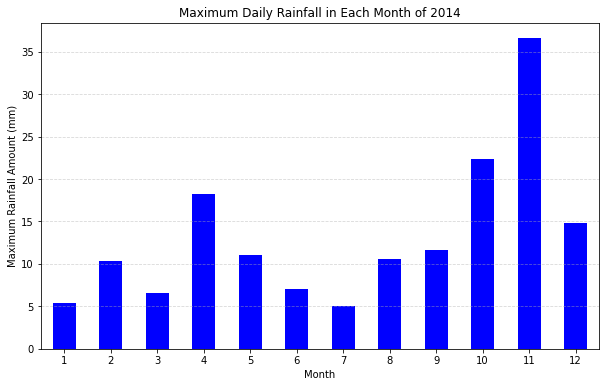

In [34]:
# bar plot
plt.figure(figsize=(10, 6)) 
max_rainfall_per_month.plot(kind='bar', color='blue')
plt.title('Maximum Daily Rainfall in Each Month of 2014')
plt.xlabel('Month')
plt.ylabel('Maximum Rainfall Amount (mm)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Task 2.2 

### Yearly Analysis

In [35]:
# daily rain in the years 2015 to 2017
daily_rainfall_2015_2017 = daily_rainfall[(daily_rainfall['Year'] >= 2015) & (daily_rainfall['Year'] <= 2017)]

In [36]:
# total annual rainfall in the years 2015 to 2017
annual_rainfall = daily_rainfall_2015_2017.groupby('Year')['Rainfall amount (millimetres)'].sum()

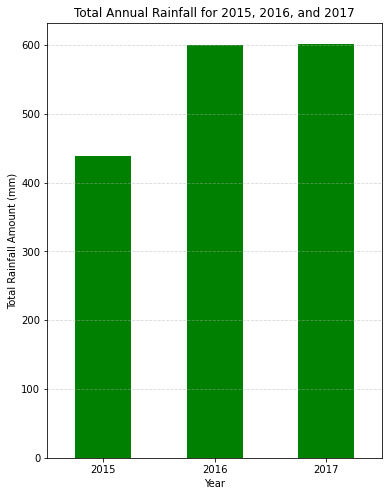

In [37]:
# plot the Total Annual Rainfall for 2015,2016 and 2017
plt.figure(figsize=(6, 8))
annual_rainfall.plot(kind='bar', color='green')
plt.title('Total Annual Rainfall for 2015, 2016, and 2017')
plt.xlabel('Year')
plt.ylabel('Total Rainfall Amount (mm)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [38]:
# maximum daily rainfall in the years 2015 to 2017
max_annual_rainfall = daily_rainfall_2015_2017.groupby('Year')['Rainfall amount (millimetres)'].max()

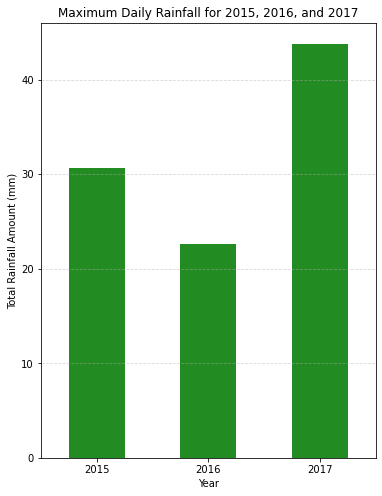

In [39]:
# plot the maximum daily rainfall for 2015, 2016 and 2017
plt.figure(figsize=(6, 8))
max_annual_rainfall.plot(kind='bar', color='forestgreen')
plt.title('Maximum Daily Rainfall for 2015, 2016, and 2017')
plt.xlabel('Year')
plt.ylabel('Total Rainfall Amount (mm)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [40]:
# days with rain
non_zero_rainfall = daily_rainfall_2015_2017[daily_rainfall_2015_2017['Rainfall amount (millimetres)'] > 0]

In [41]:
# mean rainfall in the years 2015 to 2017
mean_annual_rainfall = non_zero_rainfall.groupby('Year')['Rainfall amount (millimetres)'].mean()

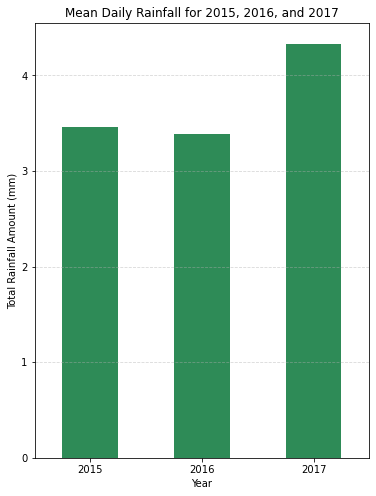

In [42]:
# plot the mean rainfall for 2015, 2016 and 2017
plt.figure(figsize=(6, 8))
mean_annual_rainfall.plot(kind='bar', color='seagreen')
plt.title('Mean Daily Rainfall for 2015, 2016, and 2017')
plt.xlabel('Year')
plt.ylabel('Total Rainfall Amount (mm)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Monthly Analysis

In [43]:
# total monthly rainfall in the years 2015 to 2017
monthly_rainfall = daily_rainfall_2015_2017.groupby(['Month', 'Year'])['Rainfall amount (millimetres)'].sum().unstack()

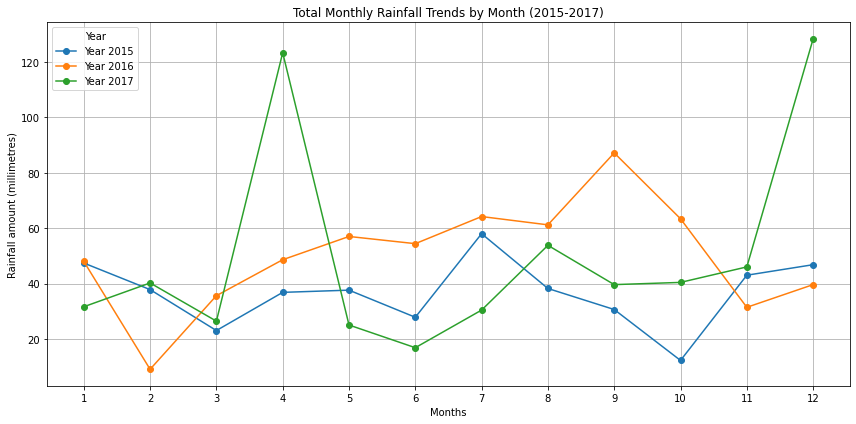

In [44]:
# plot the total monthly rainfall in the years 2015 to 2017
fig, ax = plt.subplots(figsize=(12, 6))
monthly_rainfall.plot(kind='line', marker='o', ax=ax)
plt.title('Total Monthly Rainfall Trends by Month (2015-2017)')
plt.xlabel('Months')
plt.ylabel('Rainfall amount (millimetres)')
plt.grid(True)

ax.set_xticks(range(1, len(monthly_rainfall.index)+1)) 
ax.set_xticklabels([f"{i}" for i in range(1, len(monthly_rainfall.index)+1)]) 

plt.legend(title='Year', labels=[f"Year {i}" for i in monthly_rainfall.columns])
plt.tight_layout()
plt.show()



In [45]:
# maximum daily rainfall each month in the years 2015 to 2017
max_monthly_rainfall = daily_rainfall_2015_2017.groupby(['Month', 'Year'])['Rainfall amount (millimetres)'].max().unstack()

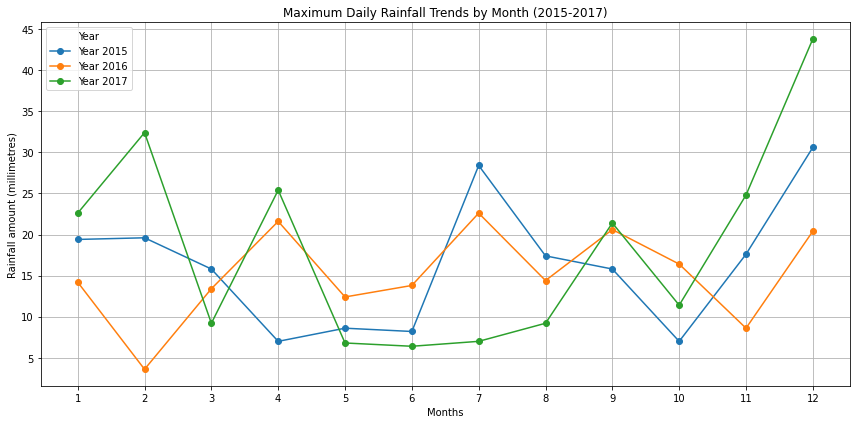

In [46]:
# plot the maximum daily rainfall each month in the years 2015 to 2017
fig, ax = plt.subplots(figsize=(12, 6))
max_monthly_rainfall.plot(kind='line', marker='o', ax=ax)
plt.title('Maximum Daily Rainfall Trends by Month (2015-2017)')
plt.xlabel('Months')
plt.ylabel('Rainfall amount (millimetres)')
plt.grid(True)

ax.set_xticks(range(1, len(monthly_rainfall.index)+1)) 
ax.set_xticklabels([f"{i}" for i in range(1, len(monthly_rainfall.index)+1)]) 

plt.legend(title='Year', labels=[f"Year {i}" for i in monthly_rainfall.columns])
plt.tight_layout()
plt.show()

In [47]:
# days with rain
non_zero_rainfall = daily_rainfall_2015_2017[daily_rainfall_2015_2017['Rainfall amount (millimetres)'] > 0]

In [48]:
# average daily rainfall each month in the years 2015 to 2017
mean_monthly_rainfall = non_zero_rainfall.groupby(['Month', 'Year'])['Rainfall amount (millimetres)'].mean().unstack()

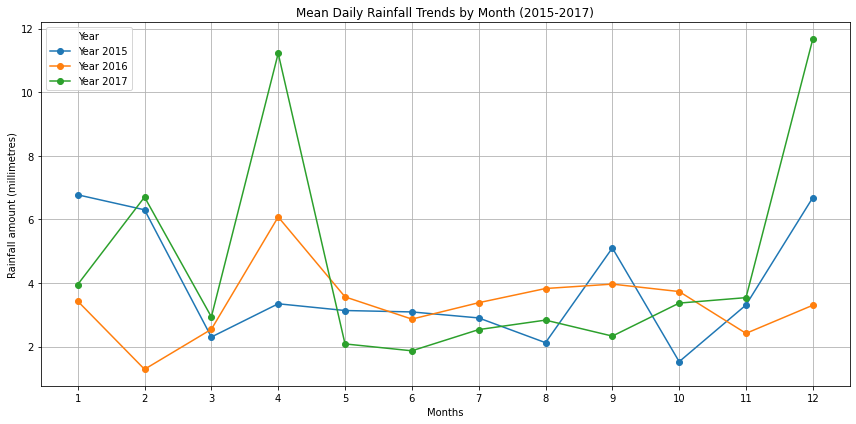

In [49]:
# plot the maximum daily rainfall each month in the years 2015 to 2017
fig, ax = plt.subplots(figsize=(12, 6))
mean_monthly_rainfall.plot(kind='line', marker='o', ax=ax)
plt.title('Mean Daily Rainfall Trends by Month (2015-2017)')
plt.xlabel('Months')
plt.ylabel('Rainfall amount (millimetres)')
plt.grid(True)

ax.set_xticks(range(1, len(monthly_rainfall.index)+1)) 
ax.set_xticklabels([f"{i}" for i in range(1, len(monthly_rainfall.index)+1)]) 

plt.legend(title='Year', labels=[f"Year {i}" for i in monthly_rainfall.columns])
plt.tight_layout()
plt.show()

## Task 2.3 

In [50]:
# Total rainfall by year
annual_rainfall = daily_rainfall.groupby('Year')['Rainfall amount (millimetres)'].sum()

In [51]:
# Finding the top 3 and bottom 3 years based on total rainfall
top_three_years = annual_rainfall.nlargest(3)
lowest_three_years = annual_rainfall.nsmallest(3)

In [52]:
# Combine the data for plotting
comparison_data = pd.concat([top_three_years, lowest_three_years])

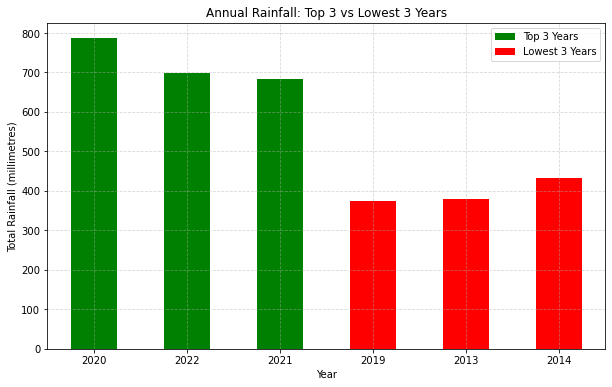

In [53]:
# Create a bar plot for visual comparison
plt.figure(figsize=(10, 6))
comparison_data.plot(kind='bar', color=['green' if year in top_three_years.index else 'red' for year in comparison_data.index])

top = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
lowest = plt.Rectangle((0,0),1,1,fc='red', edgecolor = 'none')
plt.legend([top, lowest], ['Top 3 Years', 'Lowest 3 Years'], loc='best')

plt.title('Annual Rainfall: Top 3 vs Lowest 3 Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Task 2.4

In [54]:
# Annual rainfall for 2013-2023
annual_rainfall = daily_rainfall.groupby('Year')['Rainfall amount (millimetres)'].sum()

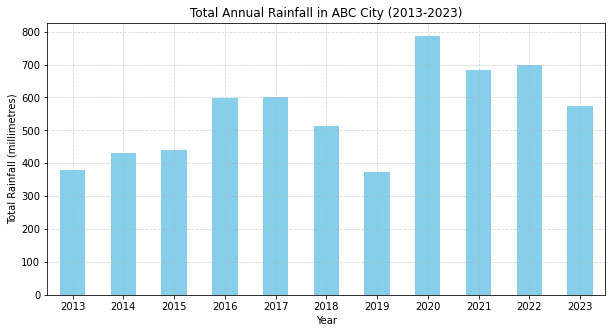

In [55]:
# Plot total annual rainfall 2013-2023
plt.figure(figsize=(10, 5))
annual_rainfall.plot(kind='bar', color='skyblue')
plt.title('Total Annual Rainfall in ABC City (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [56]:
# Maximum daily rainfall 2013-2023
max_rainfall = daily_rainfall.groupby('Year')['Rainfall amount (millimetres)'].max()

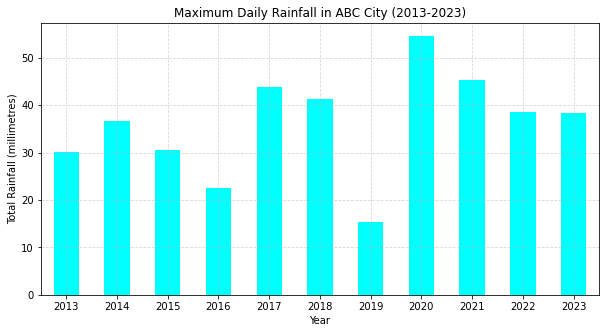

In [57]:
# Plot maximum daily rainfall 2013-2023
plt.figure(figsize=(10, 5))
max_rainfall.plot(kind='bar', color='cyan')
plt.title('Maximum Daily Rainfall in ABC City (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [58]:
# days with rain
non_zero_rainfall = daily_rainfall[daily_rainfall['Rainfall amount (millimetres)'] > 0]

In [59]:
# Mean daily rainfall 2013-2023
mean_rainfall = non_zero_rainfall.groupby('Year')['Rainfall amount (millimetres)'].mean()

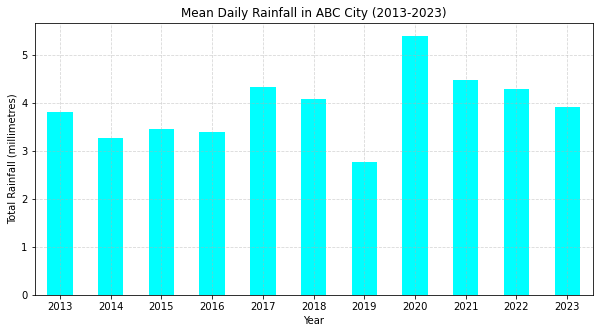

In [60]:
# Plot mean daily rainfall 2013-2023
plt.figure(figsize=(10, 5))
mean_rainfall.plot(kind='bar', color='aqua')
plt.title('Mean Daily Rainfall in ABC City (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()